In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [9]:
individual_stats = pd.read_csv('individual_stats.csv')
individual_stats.head()

,Date,Team,Opponent,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Win
0,12/3/2020,Kaukauna,Appleton North,4,31,21,12,3,1,2,3,5,35,0.535714286,18.75,19.97142857,Yes
1,12/4/2020,Kaukauna,Oshkosh West,4,35,13,5,3,0,3,3,3,15,0.421052632,6.315789474,7.275789474,Yes
2,12/8/2020,Kaukauna,Appleton East,4,34,22,12,6,0,4,4,5,40,0.545454545,21.81818182,24.30545455,Yes
3,12/11/2020,Kaukauna,Hortonville,4,44,7,2,6,2,5,7,5,6,0.5,3,5.28,Yes
4,12/12/2020,Kaukauna,De Pere,4,36,14,6,5,0,1,1,1,20,0.55,11,13.09,No


In [10]:
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   238 non-null    object
 1   Team                   238 non-null    object
 2   Opponent               238 non-null    object
 3   Player                 238 non-null    int64 
 4   Minutes                238 non-null    int64 
 5   FieldGoalAttempts      238 non-null    int64 
 6   FieldGoalMade          238 non-null    int64 
 7   Assits                 238 non-null    int64 
 8   OffensiveRebounds      238 non-null    int64 
 9   DefensiveRebounds      238 non-null    int64 
 10  TotalRebounds          238 non-null    int64 
 11  Turnovers              238 non-null    int64 
 12  Points                 238 non-null    int64 
 13  OffensiveEfficiency    238 non-null    object
 14  EfficientPointsScored  238 non-null    object
 15  RawEOP                 

In [11]:
# Replace #DIV/0! with 0s
individual_stats = individual_stats.replace('#DIV/0!', 0)
individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']] = individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']].apply(pd.to_numeric) 
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   238 non-null    object 
 1   Team                   238 non-null    object 
 2   Opponent               238 non-null    object 
 3   Player                 238 non-null    int64  
 4   Minutes                238 non-null    int64  
 5   FieldGoalAttempts      238 non-null    int64  
 6   FieldGoalMade          238 non-null    int64  
 7   Assits                 238 non-null    int64  
 8   OffensiveRebounds      238 non-null    int64  
 9   DefensiveRebounds      238 non-null    int64  
 10  TotalRebounds          238 non-null    int64  
 11  Turnovers              238 non-null    int64  
 12  Points                 238 non-null    int64  
 13  OffensiveEfficiency    238 non-null    float64
 14  EfficientPointsScored  238 non-null    float64
 15  RawEOP

In [15]:
# Make numeric data frame
individual_num = individual_stats.drop(columns = ['Team', 'Opponent'])
dummy = pd.get_dummies(individual_num['Win'])
individual_num = pd.concat([individual_num, dummy], axis = 1)
individual_num = individual_num.drop(columns = ['Win'])
individual_num = individual_num.rename(columns = {'Yes' : "Win", 'No' : "Loss"})
individual_num = individual_num[individual_num['Minutes'] >=4]
individual_num = individual_num[individual_num['OffensiveEfficiency'] < 1]
individual_num

,Date,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,4,31,21,12,3,1,2,3,5,35,0.535714,18.750000,19.971429,0,1
1,12/4/2020,4,35,13,5,3,0,3,3,3,15,0.421053,6.315789,7.275789,0,1
2,12/8/2020,4,34,22,12,6,0,4,4,5,40,0.545455,21.818182,24.305455,0,1
3,12/11/2020,4,44,7,2,6,2,5,7,5,6,0.500000,3.000000,5.280000,0,1
4,12/12/2020,4,36,14,6,5,0,1,1,1,20,0.550000,11.000000,13.090000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2/19/2021,4,36,14,8,8,0,3,3,0,22,0.727273,16.000000,20.421818,1,0
233,2/19/2021,11,5,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1,0
234,2/19/2021,15,7,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1,0
236,2/19/2021,21,36,14,4,2,1,5,6,0,10,0.400000,4.000000,4.608000,1,0


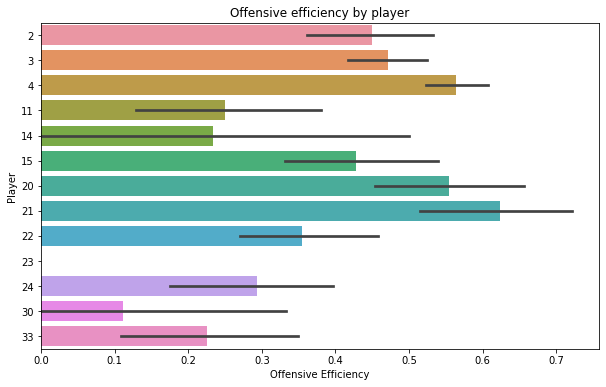

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="OffensiveEfficiency", y="Player", data=individual_num, orient = 'h')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Player")
plt.title("Offensive efficiency by player");

Text(0.5, 1.0, 'Offensive efficiency v. Raw efficient offensive production')

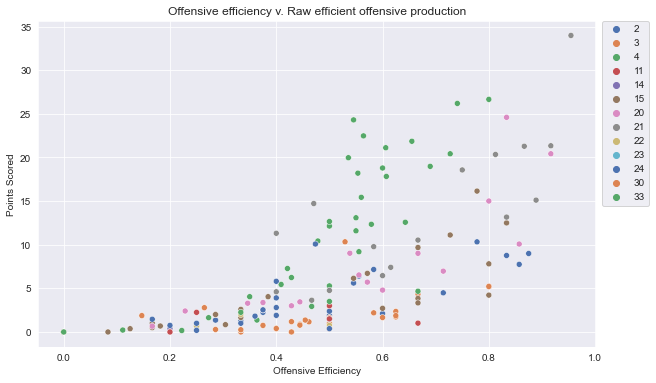

In [17]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="RawEOP", 
                hue="Player",
                data=individual_num, palette = "deep")
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Raw efficient offensive production")

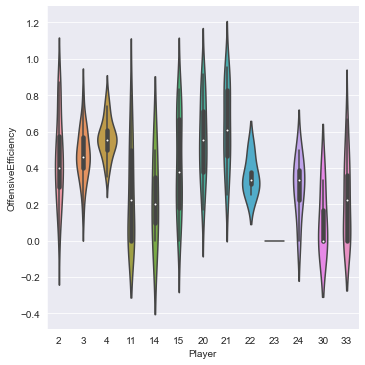

In [18]:
sns.catplot(x = "Player", y = "OffensiveEfficiency", data = individual_num, kind = 'violin');

In [19]:
individual_corr = individual_num.drop(columns = 'Player')
correlations = individual_corr.corr()
correlations

,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
Minutes,1.000000,0.733877,0.674566,0.553283,0.294648,0.510919,0.498729,0.465986,0.632894,0.512194,0.558917,0.572551,0.002527,-0.002527
FieldGoalAttempts,0.733877,1.000000,0.880161,0.646981,0.268031,0.378419,0.388086,0.345020,0.833816,0.493011,0.757514,0.762110,0.005297,-0.005297
FieldGoalMade,0.674566,0.880161,1.000000,0.564726,0.355689,0.461280,0.483939,0.351544,0.904678,0.623095,0.889715,0.872837,-0.084765,0.084765
Assits,0.553283,0.646981,0.564726,1.000000,0.160605,0.286746,0.278117,0.405999,0.667676,0.461461,0.653568,0.739461,-0.057377,0.057377
OffensiveRebounds,0.294648,0.268031,0.355689,0.160605,1.000000,0.494429,0.751020,0.208833,0.268222,0.442868,0.393543,0.384538,-0.072245,0.072245
DefensiveRebounds,0.510919,0.378419,0.461280,0.286746,0.494429,1.000000,0.945253,0.345448,0.447181,0.383577,0.465280,0.454783,-0.161353,0.161353
TotalRebounds,0.498729,0.388086,0.483939,0.278117,0.751020,0.945253,1.000000,0.340815,0.440391,0.457645,0.501189,0.489835,-0.149692,0.149692
Turnovers,0.465986,0.345020,0.351544,0.405999,0.208833,0.345448,0.340815,1.000000,0.353835,0.102649,0.265376,0.285695,-0.106817,0.106817
Points,0.632894,0.833816,0.904678,0.667676,0.268222,0.447181,0.440391,0.353835,1.000000,0.546410,0.944432,0.934910,-0.083245,0.083245
OffensiveEfficiency,0.512194,0.493011,0.623095,0.461461,0.442868,0.383577,0.457645,0.102649,0.546410,1.000000,0.673692,0.678093,-0.178602,0.178602


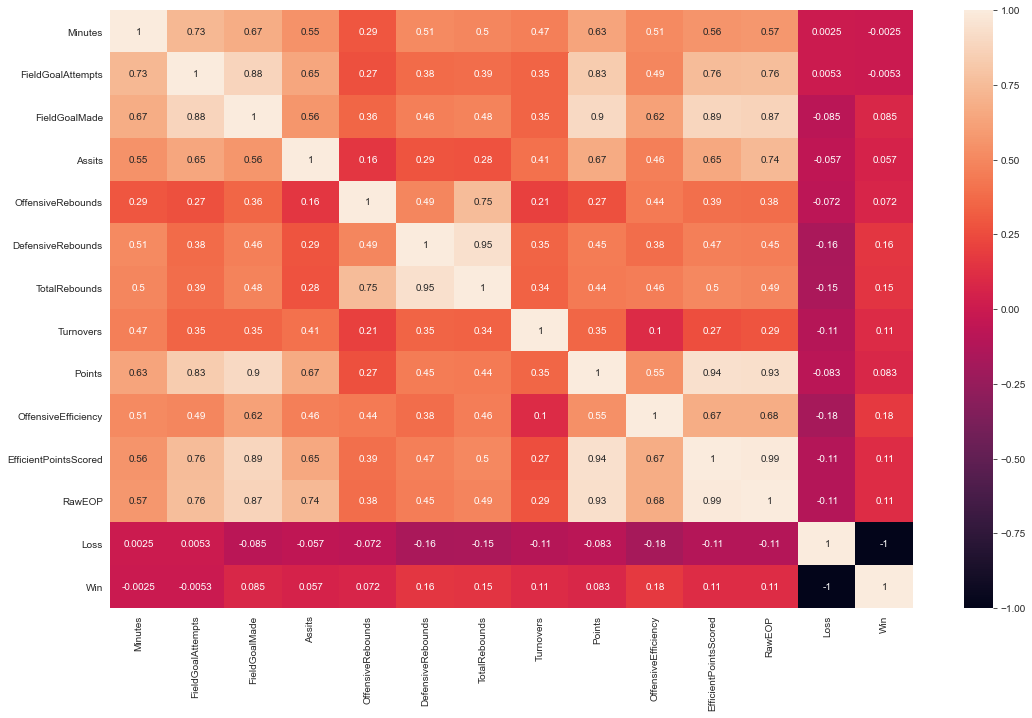

In [20]:
plt.figure(figsize=(18,11))
sns.heatmap(correlations, annot = True);

In [21]:
#For player number 4
player_4 = individual_stats[individual_stats.Player == 4]
player_4_num = player_4.drop(columns = ['Date', 'Team', 'Opponent', 'Player'])
dummy = pd.get_dummies(player_4_num['Win'])
player_4_num = pd.concat([player_4_num, dummy], axis = 1)

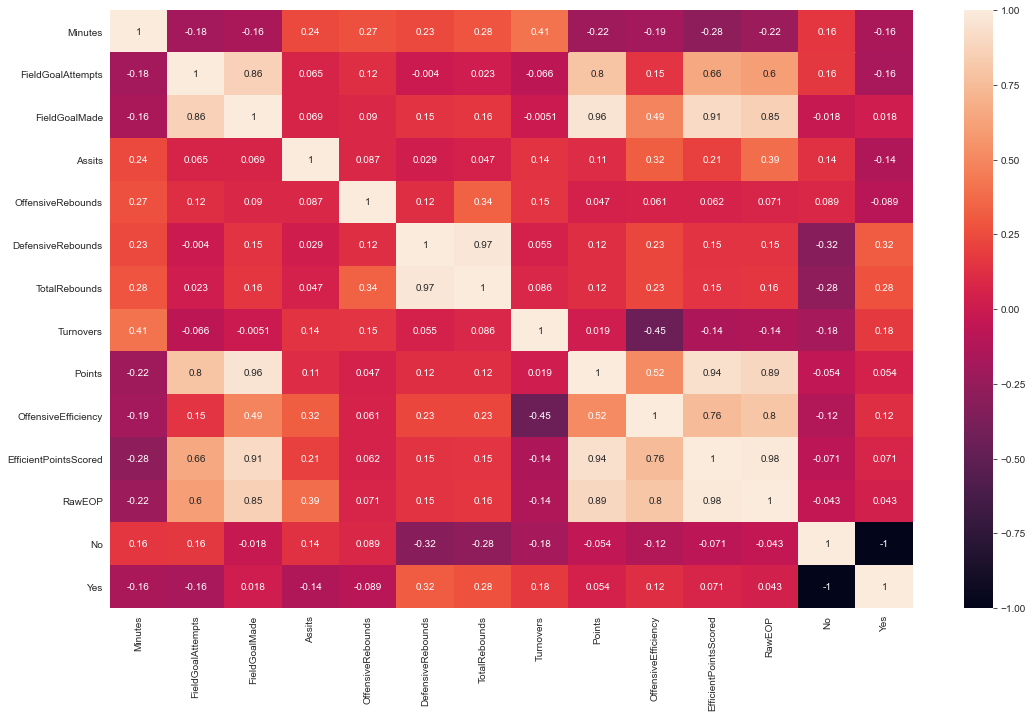

In [22]:
plt.figure(figsize=(18,11))
sns.heatmap(player_4_num.corr(), annot = True);

In [54]:
averages = individual_num.groupby(['Player']).mean().reset_index().drop(columns = ['Win', 'Loss'])
averages 

,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP
0,2,23.423077,5.884615,2.192308,1.653846,0.884615,2.538462,3.423077,1.153846,6.269231,0.449793,3.141190,3.865110
1,3,25.346154,7.423077,3.653846,0.807692,0.538462,1.346154,1.884615,1.076923,3.192308,0.471372,1.473507,1.787193
2,4,34.615385,14.615385,6.615385,6.846154,0.307692,3.384615,3.692308,2.807692,20.807692,0.563432,12.176206,15.174743
3,11,12.375000,1.687500,0.500000,0.375000,0.125000,0.250000,0.375000,0.562500,2.062500,0.250000,0.718750,0.897667
4,14,5.000000,2.666667,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,1.666667,0.233333,0.633333,0.633333
5,15,20.160000,5.120000,2.000000,0.920000,0.160000,0.920000,1.080000,0.760000,6.800000,0.427232,3.687157,4.098503
6,20,29.941176,8.705882,4.647059,1.058824,1.941176,6.235294,8.176471,1.882353,11.352941,0.553997,7.199632,7.699638
7,21,30.277778,10.388889,5.888889,3.166667,2.611111,5.000000,7.611111,2.055556,15.111111,0.623624,10.449013,12.133064
8,22,8.250000,3.750000,0.750000,1.000000,0.000000,1.000000,1.000000,0.500000,2.000000,0.354167,0.625000,0.925833
9,23,4.500000,0.000000,0.000000,0.000000,0.500000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000


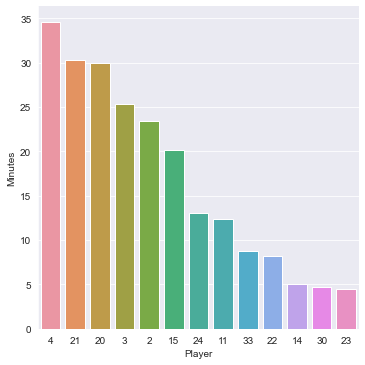

In [83]:
minutes_ordered = averages.sort_values(by = 'Minutes', ascending = False).Player
minutes_plot = sns.catplot(data = averages, kind = "bar", x = "Player", y = "Minutes", order = minutes_ordered)

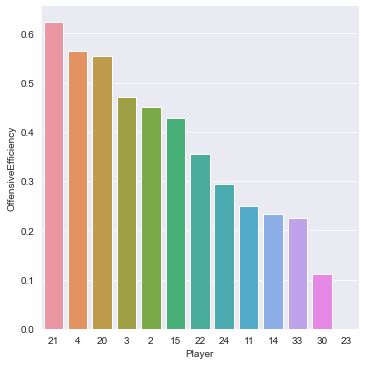

In [84]:
offensive_efficiency_ordered = averages.sort_values(by = 'OffensiveEfficiency', ascending = False).Player
offensive_efficiency_plot = sns.catplot(data = averages, kind = "bar", x = "Player", y = "OffensiveEfficiency", order = offensive_efficiency_ordered)

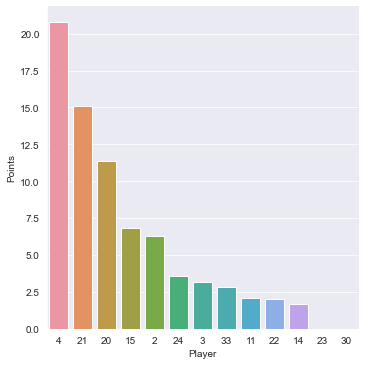

In [120]:
points_ordered = averages.sort_values(by = 'Points', ascending = False).Player
points_plot = sns.catplot(data = averages, kind = "bar", x = "Player", y = "Points", order = points_ordered)